Część I

In [1]:
# Krok 0: wczytaj pandas
import pandas as pd

# Krok 1: wczytaj dane z pliku US_Baby_Names_right.csv przypisz dane do zmiennej baby_names.
baby_names = pd.read_csv("US_Baby_Names_right.csv")

# Krok 2: Zobacz jakiego typu dane są przechowywane i ile jest rekordów.
print(baby_names.dtypes)
print(baby_names.shape)

# Krok 3: podejrzy pierwszych 10 rekordów ze zbioru
print(baby_names.head(10))

# Krok 4: usuń kolumny 'Unnamed: 0' oraz 'Id'
baby_names = baby_names.drop(columns=['Unnamed: 0', 'Id'])

# Krok 5: czy w zbiorze jest więcej imion kobiet, czy mężczyzn?
counts = baby_names['Gender'].value_counts()
if counts['F'] > counts['M']:
    print("W zbiorze jest więcej imion kobiet")
elif counts['F'] < counts['M']:
    print("W zbiorze jest więcej imion mężczyzn")
else: 
    print("W zbiorze jest tyle samo imion męskich co żeńskich")

# Krok 6: zgrupuj wiersze względem imion i wypisz 10 najczęściej pojawiających się imion.
name_counts = baby_names.groupby('Name').size().reset_index(name='Count')
top_names = name_counts.sort_values(by='Count', ascending=False).head(10)
print(top_names)

Unnamed: 0     int64
Id             int64
Name          object
Year           int64
Gender        object
State         object
Count          int64
dtype: object
(1016395, 7)
   Unnamed: 0     Id      Name  Year Gender State  Count
0       11349  11350      Emma  2004      F    AK     62
1       11350  11351   Madison  2004      F    AK     48
2       11351  11352    Hannah  2004      F    AK     46
3       11352  11353     Grace  2004      F    AK     44
4       11353  11354     Emily  2004      F    AK     41
5       11354  11355   Abigail  2004      F    AK     37
6       11355  11356    Olivia  2004      F    AK     33
7       11356  11357  Isabella  2004      F    AK     30
8       11357  11358    Alyssa  2004      F    AK     29
9       11358  11359    Sophia  2004      F    AK     28
W zbiorze jest więcej imion kobiet
         Name  Count
14062   Riley   1112
2174    Avery   1080
8500   Jordan   1073
13459  Peyton   1064
6584   Hayden   1049
15873  Taylor   1033
7892   Jayden   1

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Ava'),
  Text(1, 0, 'Natalie'),
  Text(2, 0, 'Emily'),
  Text(3, 0, 'Emma'),
  Text(4, 0, 'Ella'),
  Text(5, 0, 'Madison'),
  Text(6, 0, 'Isabella'),
  Text(7, 0, 'Abigail'),
  Text(8, 0, 'Sophia'),
  Text(9, 0, 'Chloe')])

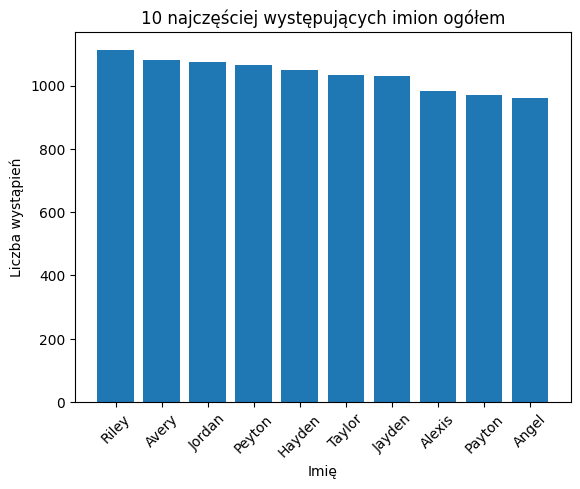

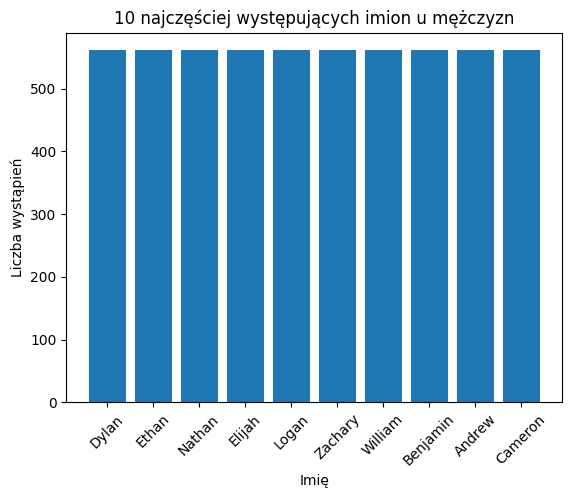

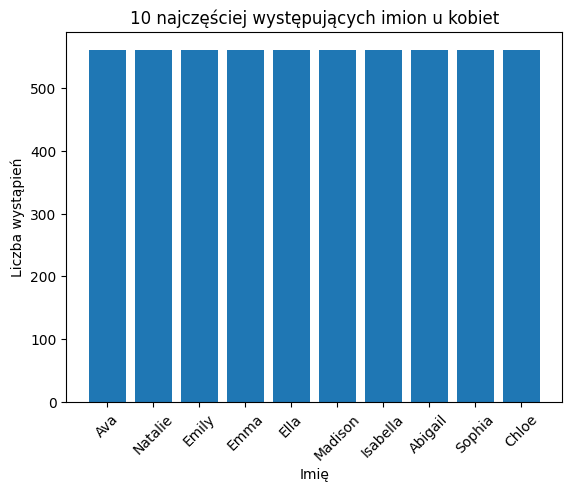

In [6]:
# Krok 7: wyniki z Kroku 6 zaprezentuj na wykresie korzystając z matplotlib. Przygotuj trzy wykresy, tj. 10 najczęsciej występujących imion: ogółem, u mężczyzn i u kobiet.
import matplotlib.pyplot as plt

# Wykres ogółem
plt.figure()
plt.bar(top_names['Name'], top_names['Count'])
plt.title("10 najczęściej występujących imion ogółem")
plt.xlabel("Imię")
plt.ylabel("Liczba wystąpień")
plt.xticks(rotation=45)

# Wykres dla mężczyzn
plt.figure()
male_names = baby_names[baby_names['Gender'] == 'M']
male_name_counts = male_names.groupby('Name').size().reset_index(name='Count')
top_male_names = male_name_counts.sort_values(by='Count', ascending=False).head(10)
plt.bar(top_male_names['Name'], top_male_names['Count'])
plt.title("10 najczęściej występujących imion u mężczyzn")
plt.xlabel("Imię")
plt.ylabel("Liczba wystąpień")
plt.xticks(rotation=45)

# Wykres dla kobiet
plt.figure()
female_names = baby_names[baby_names['Gender'] == 'F']
female_name_counts = female_names.groupby('Name').size().reset_index(name='Count')
top_female_names = female_name_counts.sort_values(by='Count', ascending=False).head(10)
plt.bar(top_female_names['Name'], top_female_names['Count'])
plt.title("10 najczęściej występujących imion u kobiet")
plt.xlabel("Imię")
plt.ylabel("Liczba wystąpień")
plt.xticks(rotation=45)

In [37]:
# Krok 8: Jak wiele różnych imion występuje w zbiorze?
num_unique_names = baby_names['Name'].nunique() #len(baby_names['Name'].unique())
print(f"W zbiorze występuje {num_unique_names} różnych imion.")

# Krok 9: Przygotuj generator imion, losujący je zgodnie z rozkłądem prawdopodobieństwa otrzymanym na podstawie przetwarzanego pliku
import random

def generate_name():
    total_count = baby_names['Name'].count()
    random_index = random.randint(0, total_count - 1)
    return baby_names.iloc[random_index]['Name']

# Krok 10: Jakie imie występuje najczęściej?
most_common_name = name_counts.sort_values(by='counts', ascending=False).iloc[0]['Name']
print(f"Najczęściej występujące imię to {most_common_name}.")

# Wyznacz średnią, medianę i odchylenie stanadrdowe wystepowania imion.
mean = name_counts['counts'].mean()
median = name_counts['counts'].median()
std = name_counts['counts'].std()
print(f"Średnia liczba wystąpień imienia w zbiorze: {mean:.2f}")
print(f"Mediana liczby wystąpień imienia w zbiorze: {median:.2f}")
print(f"Odchylenie standardowe liczby wystąpień imienia w zbiorze: {std:.2f}")

W zbiorze występuje 17632 różnych imion.
Najczęściej występujące imię to Riley.
Średnia liczba wystąpień imienia w zbiorze: 57.64
Mediana liczby wystąpień imienia w zbiorze: 8.00
Odchylenie standardowe liczby wystąpień imienia w zbiorze: 122.03


Część II

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Krok 1: Wczytaj dane z pliku ocupation.csv, nazwy kolumn będą takie: user_id, age, gender, occupation, zip_code
df = pd.read_csv('ocupation.csv', sep = '|')

# Krok 2: Podejrzyj pierwsze 25 rekordów
print(df.head(25))

# Krok 3: Podejrzyj ostatnie 10 rekordów
print(df.tail(10))

# Krok 4: Ile jest obserwacji w zbiorze? Ile jest kolumn w zbiorze?
print(f"Liczba obserwacji: {df.shape[0]}")
print(f"Liczba kolumn: {df.shape[1]}")

# Krok 5: Wypisz nazwy kolumn
print(f"Nazwy kolumn: {df.columns}")

# Krok 6: Ile różnych zawodów jest w zbiorze?
num_unique_occup = df['occupation'].nunique()
print(f"W zbiorze występuje {num_unique_occup} różnych zawodów.")


    user_id  age gender     occupation zip_code
0         1   24      M     technician    85711
1         2   53      F          other    94043
2         3   23      M         writer    32067
3         4   24      M     technician    43537
4         5   33      F          other    15213
5         6   42      M      executive    98101
6         7   57      M  administrator    91344
7         8   36      M  administrator    05201
8         9   29      M        student    01002
9        10   53      M         lawyer    90703
10       11   39      F          other    30329
11       12   28      F          other    06405
12       13   47      M       educator    29206
13       14   45      M      scientist    55106
14       15   49      F       educator    97301
15       16   21      M  entertainment    10309
16       17   30      M     programmer    06355
17       18   35      F          other    37212
18       19   40      M      librarian    02138
19       20   42      F      homemaker  

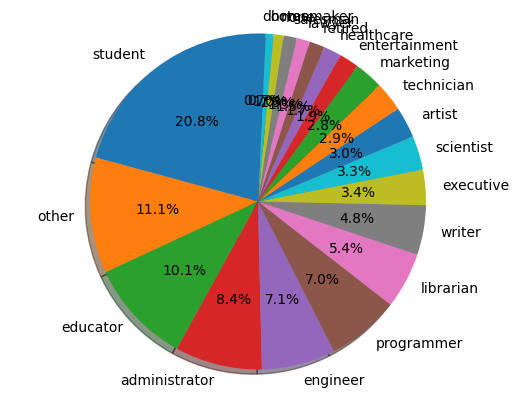

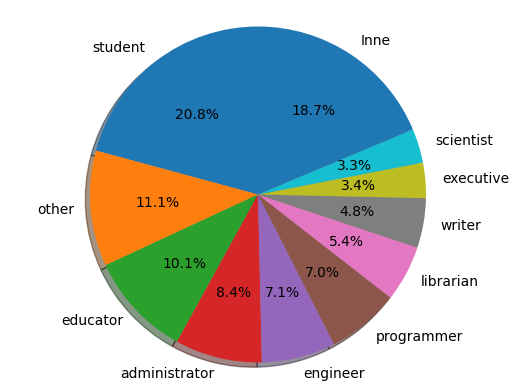

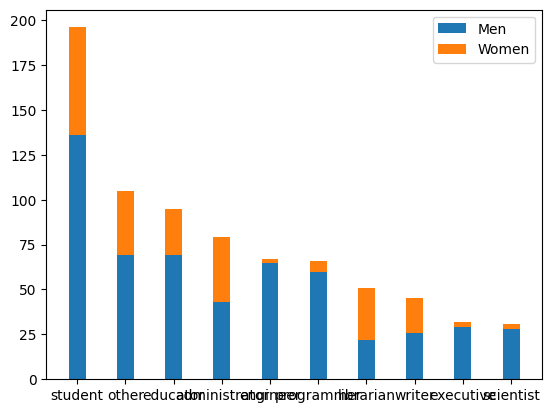

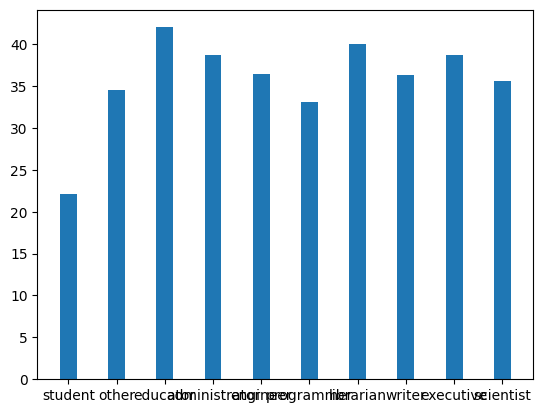

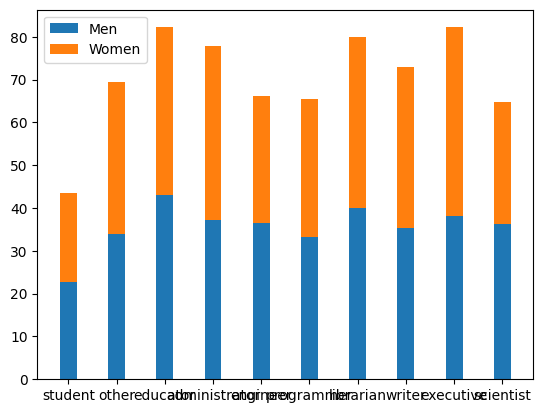

In [39]:
# Liczba osób w każdym zawodzie
occ_counts = df['occupation'].value_counts()

# Krok 7: Przygotuj efektywny wykres na którym przedstawisz procentowy 
# udział poszczególnych zawodów w zbiorze na charplocie Wykorzystaj 
# https://matplotlib.org/examples/pie_and_polar_charts/pie_demo_features.html

# Przygotuj dwa wykresy:
# jeden z wszystkimi zawodami:

labels = occ_counts.index
sizes = occ_counts.values

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')
plt.show()

# drugi z 10 najczęstszymi zawodami, pozostałe zawody trafiają do kategorii Inne:
top_10_labels = occ_counts[:10].index
other_labels = occ_counts[10:].index
top_10_sizes = occ_counts[:10].values
other_sizes = occ_counts[10:].sum()
labels = list(top_10_labels) + ['Inne']
sizes = list(top_10_sizes) + [other_sizes]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')
plt.show()


# Krok 8: Przygotuj efektywny wykres na którym przedstawisz 10 najczęstrzych zawodów oraz ile pracuje 
# w nich kobiet a ilu meżczyzn
top_10_occ = occ_counts[:10].index
men_counts = []
women_counts = []
for occ in top_10_occ:
    men_count = df[(df['occupation'] == occ) & (df['gender'] == 'M')].shape[0]
    women_count = df[(df['occupation'] == occ) & (df['gender'] == 'F')].shape[0]
    men_counts.append(men_count)
    women_counts.append(women_count)

fig, ax = plt.subplots()
x = range(len(top_10_occ))

rects1 = ax.bar(x, men_counts, 0.35, label='Men')
rects2 = ax.bar(x, women_counts, 0.35, bottom=men_counts, label='Women')
plt.xticks(x, top_10_occ)
ax.legend()
plt.show()

# Krok 9: Przygotuj efektywny wykres na którym przedstawisz średni wiek pracowników danego zawodu
age_mean = df.groupby('occupation')['age'].mean().reset_index(name='mean_age')
top_10_occ = occ_counts[:10].index
ages = []
for occ in top_10_occ:
    occ_mean_age = age_mean[age_mean['occupation'] == occ]['mean_age'].values
    ages.append(occ_mean_age[0] if occ_mean_age else 0)

fig, ax = plt.subplots()
x = range(len(top_10_occ))

rects = ax.bar(x, ages, 0.35)
plt.xticks(x, top_10_occ)
plt.show()

# Krok 10: przygotuj wykres słupkowy przedstawiający średni wiek kobiet i mężczyzn wykonujących dany zawód
age_mean_gender = df.groupby(['occupation', 'gender'])['age'].mean().reset_index(name='mean_age')
top_10_occ = occ_counts[:10].index
men_ages = []
women_ages = []
for occ in top_10_occ:
    occ_mean_age_men = age_mean_gender[(age_mean_gender['occupation'] == occ) & (age_mean_gender['gender'] == 'M')]['mean_age'].values
    occ_mean_age_women = age_mean_gender[(age_mean_gender['occupation'] == occ) & (age_mean_gender['gender'] == 'F')]['mean_age'].values
    men_ages.append(occ_mean_age_men[0] if occ_mean_age_men else 0)
    women_ages.append(occ_mean_age_women[0] if occ_mean_age_women else 0)

fig, ax = plt.subplots()
x = range(len(top_10_occ))

rects1 = ax.bar(x, men_ages, 0.35, label='Men')
rects2 = ax.bar(x, women_ages, 0.35, bottom=men_ages, label='Women')
plt.xticks(x, top_10_occ)
ax.legend()
plt.show()


